In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [599]:
df=pd.read_csv("housing-5.csv")
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [600]:
# find duplicate rows
df_dup=df.duplicated()
df_dup

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [601]:
df[df_dup]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [602]:
df[df.duplicated(['longitude','latitude'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20597,-121.58,39.16,33.0,1897.0,378.0,888.0,385.0,2.1111,68700.0,INLAND
20598,-121.58,39.15,38.0,1756.0,396.0,837.0,401.0,1.9122,55500.0,INLAND
20599,-121.56,39.16,35.0,2157.0,441.0,1009.0,409.0,1.5827,63000.0,INLAND
20600,-121.57,39.16,18.0,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND


Missing Values
when reading in missing values pandas will display them as anan a serious problem when it comes to running ML algorithm

to deal with it
* Keep it
* Remove it
* Replace it

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [604]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [605]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [606]:
df[df["total_bedrooms"].isnull()]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [607]:
df_c1 = df.dropna(subset=["total_bedrooms"])
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [608]:
df_c1 = df.copy()

In [609]:
df_c1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [610]:
df_c1[df_c1['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Replace

In [611]:
df_c2 = df.copy()
df_c2['total_bedrooms'] = df_c2['total_bedrooms'].fillna(0)
df_c2[df_c2['total_bedrooms'] == 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,0.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,0.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,0.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,0.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,0.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,0.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,0.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,0.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,0.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [612]:
df_c2[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,0.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,0.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,0.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,0.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,0.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,0.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,0.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,0.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,0.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [613]:
df_c3 = df.copy()

In [614]:
df_c3['total_bedrooms'].mean()

np.float64(537.8705525375618)

In [615]:
df_c3['total_bedrooms'] = df_c3['total_bedrooms'].fillna(int(df_c3['total_bedrooms'].mean()))

df_c3[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,537.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,537.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,537.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,537.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,537.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,537.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,537.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,537.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,537.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [616]:
df_c4 = df.copy()

In [617]:
df_c4['ratio'] = df_c4['total_rooms'] / df_c4['total_bedrooms']

In [618]:
df_c4

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,4.451872
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,4.646667
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,4.647423
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,4.547677


In [619]:
df_c4['ratio'].describe()

count    20433.000000
mean         4.984829
std          1.171676
min          1.000000
25%          4.169782
50%          4.922170
75%          5.700364
max         10.000000
Name: ratio, dtype: float64

In [620]:
mask = df_c4['total_bedrooms'].isna()

In [621]:
mask

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [622]:
df_c4.loc[mask, 'total_bedrooms'] = df_c4.loc[mask, 'total_rooms']/df_c4['ratio'].mean()

In [623]:
df_c4[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio
290,-122.16,37.77,47.0,1256.0,251.964516,570.0,218.0,4.3750,161900.0,NEAR BAY,NaN
341,-122.17,37.75,38.0,992.0,199.003822,732.0,259.0,1.6196,85100.0,NEAR BAY,NaN
538,-122.28,37.78,29.0,5154.0,1033.937194,3741.0,1273.0,2.5762,173400.0,NEAR BAY,NaN
563,-122.24,37.75,45.0,891.0,178.742344,384.0,146.0,4.9489,247100.0,NEAR BAY,NaN
696,-122.10,37.69,41.0,746.0,149.654084,387.0,161.0,3.9063,178400.0,NEAR BAY,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,726.203462,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,NaN
20268,-119.18,34.19,19.0,2393.0,480.056598,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,NaN
20372,-118.88,34.17,15.0,4260.0,854.593024,1701.0,669.0,5.1033,410700.0,<1H OCEAN,NaN
20460,-118.75,34.29,17.0,5512.0,1105.755106,2734.0,814.0,6.6073,258100.0,<1H OCEAN,NaN


In [624]:
df_c4 = df_c4.astype({
    'total_bedrooms': 'int32'
})

In [625]:
df_c4

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374,845.0,330.0,1.5603,78100.0,INLAND,4.451872
20636,-121.21,39.49,18.0,697.0,150,356.0,114.0,2.5568,77100.0,INLAND,4.646667
20637,-121.22,39.43,17.0,2254.0,485,1007.0,433.0,1.7000,92300.0,INLAND,4.647423
20638,-121.32,39.43,18.0,1860.0,409,741.0,349.0,1.8672,84700.0,INLAND,4.547677


In [626]:
df_c4[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio
290,-122.16,37.77,47.0,1256.0,251,570.0,218.0,4.3750,161900.0,NEAR BAY,NaN
341,-122.17,37.75,38.0,992.0,199,732.0,259.0,1.6196,85100.0,NEAR BAY,NaN
538,-122.28,37.78,29.0,5154.0,1033,3741.0,1273.0,2.5762,173400.0,NEAR BAY,NaN
563,-122.24,37.75,45.0,891.0,178,384.0,146.0,4.9489,247100.0,NEAR BAY,NaN
696,-122.10,37.69,41.0,746.0,149,387.0,161.0,3.9063,178400.0,NEAR BAY,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,726,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,NaN
20268,-119.18,34.19,19.0,2393.0,480,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,NaN
20372,-118.88,34.17,15.0,4260.0,854,1701.0,669.0,5.1033,410700.0,<1H OCEAN,NaN
20460,-118.75,34.29,17.0,5512.0,1105,2734.0,814.0,6.6073,258100.0,<1H OCEAN,NaN


In [627]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### more complex approach: a specifc ratio for each category (ocean proximity)

In [628]:
df_c5 = df.copy()

In [629]:
df_c5['ratio'] = df_c5['total_rooms'] / df_c5['total_bedrooms']

In [630]:
df_c5.groupby('ocean_proximity')['ratio'].mean()

ocean_proximity
<1H OCEAN     4.932506
INLAND        5.099607
ISLAND        3.695866
NEAR BAY      4.994362
NEAR OCEAN    4.875201
Name: ratio, dtype: float64

In [631]:
df_c5['ratio'] = df_c5.groupby('ocean_proximity', group_keys=False)['ratio'].apply(lambda x: x.fillna(x.mean()))

In [632]:
for i in range(len(df_c5)):
    if pd.isna(df_c5.loc[i, 'total_bedrooms']): 
        df_c5.loc[i, 'total_bedrooms'] = int(df_c5.loc[i, 'total_rooms']/df_c5.loc[i, 'ratio'])

In [633]:
df_c5[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio
290,-122.16,37.77,47.0,1256.0,251.0,570.0,218.0,4.3750,161900.0,NEAR BAY,4.994362
341,-122.17,37.75,38.0,992.0,198.0,732.0,259.0,1.6196,85100.0,NEAR BAY,4.994362
538,-122.28,37.78,29.0,5154.0,1031.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.994362
563,-122.24,37.75,45.0,891.0,178.0,384.0,146.0,4.9489,247100.0,NEAR BAY,4.994362
696,-122.10,37.69,41.0,746.0,149.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.994362
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,742.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,4.875201
20268,-119.18,34.19,19.0,2393.0,490.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,4.875201
20372,-118.88,34.17,15.0,4260.0,863.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN,4.932506
20460,-118.75,34.29,17.0,5512.0,1117.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN,4.932506


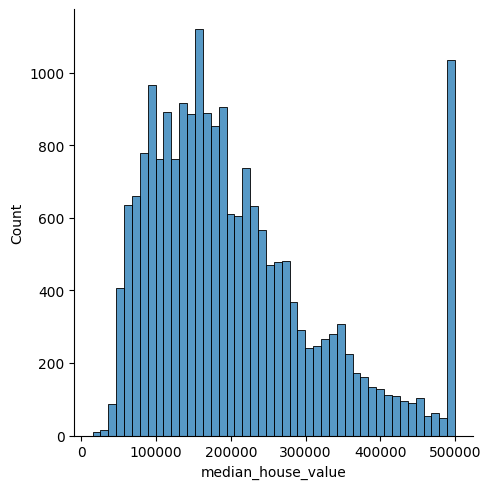

In [634]:
sns.displot(df['median_house_value'])

<Axes: xlabel='median_income', ylabel='median_house_value'>

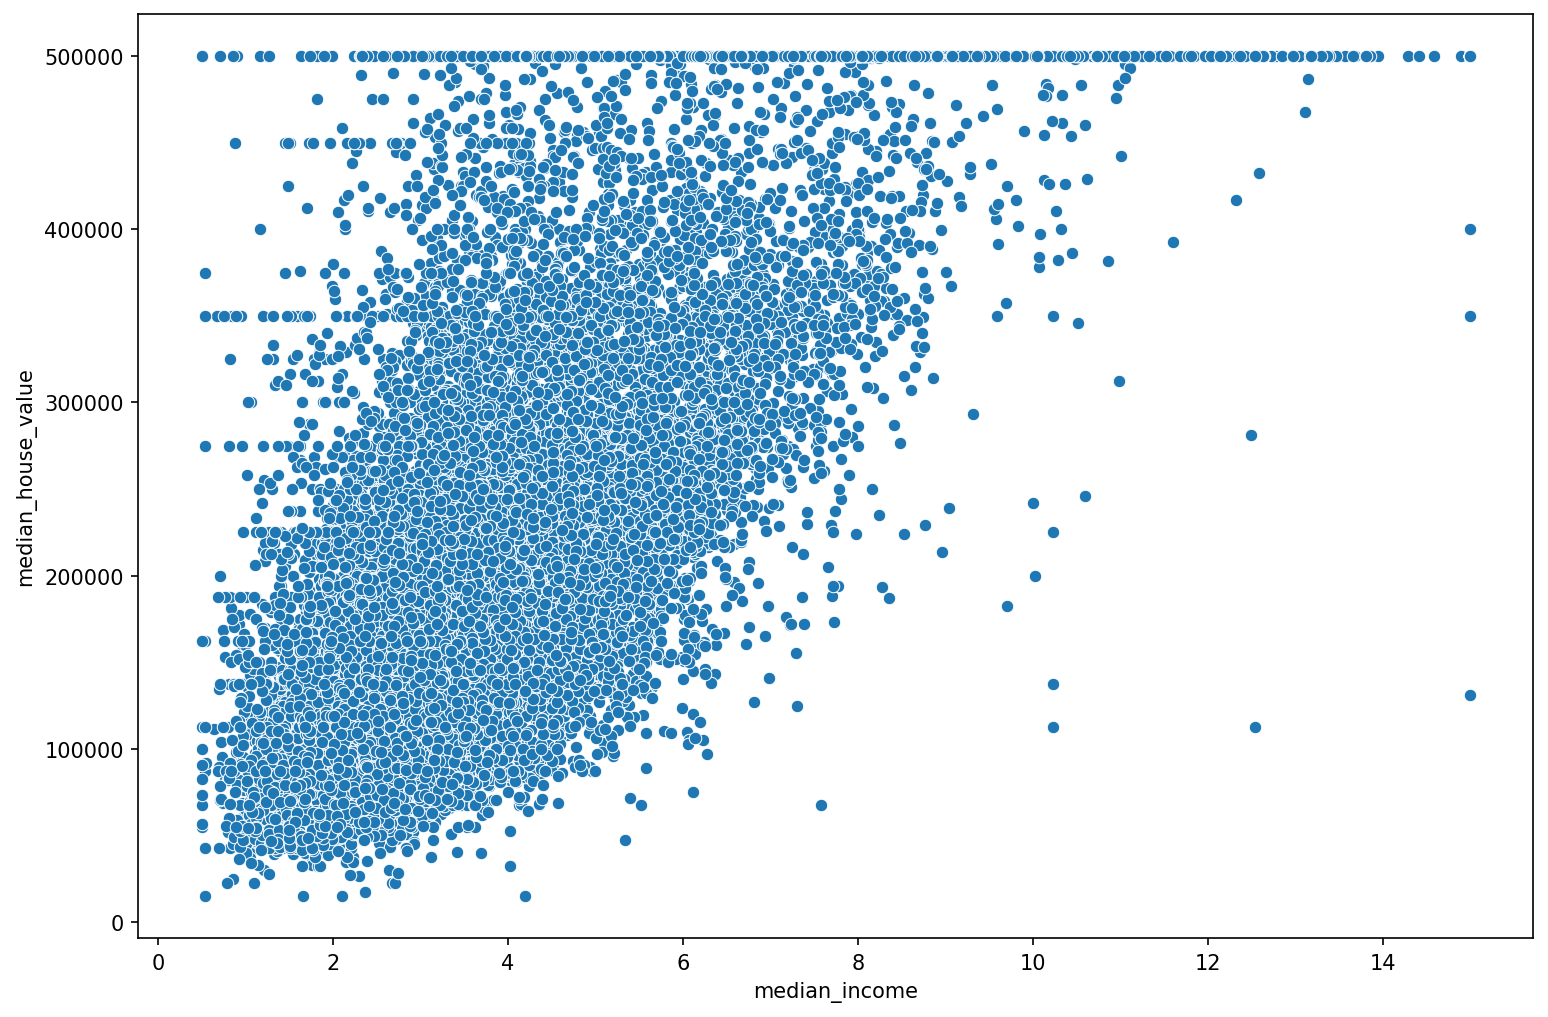

In [635]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(x='median_income', y='median_house_value', data=df)

In [636]:
df[df['median_house_value']>500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


<Axes: ylabel='housing_median_age'>

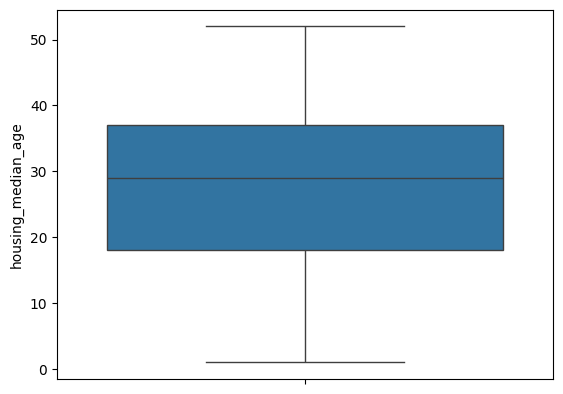

In [637]:
sns.boxplot(df['housing_median_age'])

In [638]:
df['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [639]:
upper = df['housing_median_age'].quantile(0.75)
lower = df['housing_median_age'].quantile(0.25)

iqr = upper - lower

In [640]:
lower_whisk = lower - 1.5*iqr

In [641]:
upper_whisk = upper + 1.5*iqr

In [642]:
lower_whisk

np.float64(-10.5)

In [643]:
upper_whisk

np.float64(65.5)

(0.0, 6000.0)

<Figure size 1500x900 with 0 Axes>

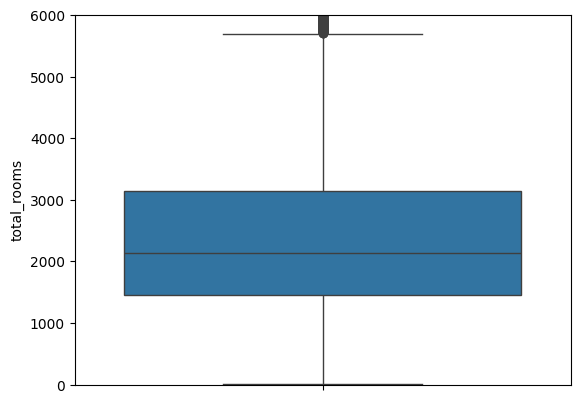

In [644]:
plt.figure(figsize=(10,6), dpi=150)
fig, ax = plt.subplots()
sns.boxplot(df['total_rooms'], ax=ax)
ax.set_ylim(0,6000)

In [645]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [648]:
upper = df['total_rooms'].quantile(0.75)
lower = df['total_rooms'].quantile(0.25)

iqr = upper - lower

lower_b = lower - 1.5*iqr
upper_b = upper + 1.5*iqr

In [649]:
upper_b, lower_b

(np.float64(5698.375), np.float64(-1102.625))

In [652]:
df[df['total_rooms']>upper_b]['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     546
INLAND        503
NEAR OCEAN    128
NEAR BAY      110
Name: count, dtype: int64